_This notebook walks through data integration, model building, and optimization. The end result is a curated summary of information that can be used to maximize cost savings for renewable energy use._

# Environment Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sundial

/Users/ryanstoddard/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/ryanstoddard/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Getting the Data

## Download files

In [ ]:
TBD?

## Integrate data 

In [ ]:
TBD?

# Building Independent Models

## Battery Degradation

In [72]:
# Set battery statics
usage_kWhr = 8
t_start    = 18   # 6:00pm, sun goes down
t_final    = 22   # 10:00pm, this means battery stops at 10:00pm, not 10:59
date       = 343  # Dec 9th
cap_kWhr   = 100 # battery capacity
cost_mult  = 55*cap_kWhr # cost scales with capacity, adjust to make relavent if needed

# Compute battery degradation cost per hour.
battery_cph = sundial.battery_model.bat_price_per_hour(usage_kWhr, 
                                                       t_start,
                                                       t_final,
                                                       date,
                                                       cap_kWhr,
                                                       cost_mult)

print(battery_cph)

[ 0.05195394  0.05195394  0.05195394  0.05195394  0.05195394  0.05195394
  0.05195394  0.05195394  0.05195394  0.05195394  0.05195394  0.05195394
  0.05195394  0.05195394  0.05195394  0.05195394  0.05195394  0.05195394
  0.11098881  0.11098881  0.11098881  0.11098881  0.05195394  0.05195394]


## Energy Price

In [3]:
epm = sundial.price_model.EnergyPriceModel()
price_cph = epm.test_model("2016-12-08", "SVM_rbf")

print(price_cph)

[ 32.19015215  36.43083971  31.89780703  28.93836475  31.43631105
  31.00931086  29.58275531  29.1197807   28.57548864  30.70826625
  32.90944406  32.52323928  28.02839139  25.80837985  24.78875951
  29.32269832  21.13044295  19.29652082  47.3891587   31.71214353
  40.31117218  24.71340464  56.25528621  43.67043595]


/Users/ryanstoddard/anaconda/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator SVR from version 0.19.1 when using version 0.18.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


## Solar Output

In [4]:
pv_output_cph = sundial.pv_model.pv_output_cph()
print(pv_output_cph)

[ 0.91129832  0.90687765  0.81942237  0.86696846  0.90845323  0.83920045
  0.82620585  0.93861113  0.91534597  0.91170437  0.91153005  0.91150407
  0.91150406  0.91150445  0.9115041   0.91150406  0.91150514  0.91481715
  0.9115074   0.90616745  0.90467126  0.91117798  0.91097029  0.91146144]


## Energy Demand

In [5]:
demand_cph = sundial.demand_model.get_demand_cph()

/Users/ryanstoddard/Documents/UW/CSE_586/Project/SunDial/sundial/demand_model/demand_model.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  sm_obs["DateTime"] = sm_datetime


['Date/Time', 'Electricity:Facility [kW](Hourly)', 'Gas:Facility [kW](Hourly)', 'Heating:Electricity [kW](Hourly)', 'Heating:Gas [kW](Hourly)', 'HVACFan:Fans:Electricity [kW](Hourly)', 'Electricity:HVAC [kW](Hourly)', 'Fans:Electricity [kW](Hourly)', 'General:InteriorLights:Electricity [kW](Hourly)', 'General:ExteriorLights:Electricity [kW](Hourly)', 'Appl:InteriorEquipment:Electricity [kW](Hourly)', 'Misc:InteriorEquipment:Electricity [kW](Hourly)', 'Water Heater:WaterSystems:Gas [kW](Hourly) ', 'DateTime', 'STATION', 'NAME', 'DATE', 'HLY-CLDH-NORMAL', 'HLY-CLOD-PCTBKN', 'HLY-CLOD-PCTCLR', 'HLY-CLOD-PCTFEW', 'HLY-CLOD-PCTOVC', 'HLY-CLOD-PCTSCT', 'HLY-DEWP-10PCTL', 'HLY-DEWP-90PCTL', 'HLY-DEWP-NORMAL', 'HLY-HIDX-NORMAL', 'HLY-HTDH-NORMAL', 'HLY-PRES-10PCTL', 'HLY-PRES-90PCTL', 'HLY-PRES-NORMAL', 'HLY-TEMP-10PCTL', 'HLY-TEMP-90PCTL', 'HLY-TEMP-NORMAL', 'HLY-WCHL-NORMAL', 'HLY-WIND-1STDIR', 'HLY-WIND-1STPCT', 'HLY-WIND-2NDDIR', 'HLY-WIND-2NDPCT', 'HLY-WIND-AVGSPD', 'HLY-WIND-PCTCLM', 'HL

## Integrating Cost Models

In [62]:
df = pd.DataFrame({'battery_cph': battery_cph,
                  'price_cph': price_cph,
                  'demand_cph': demand_cph,
                  'pv_out_cph': pv_output_cph})
df['demand_cph'][0] = df['demand_cph'][1]
df['demand_cph'] = df['demand_cph']*10
print(df)

    battery_cph  demand_cph  price_cph  pv_out_cph
0      0.047231    5.817405  32.190152    0.911298
1      0.047231    5.817405  36.430840    0.906878
2      0.047231    5.194910  31.897807    0.819422
3      0.047231    5.023098  28.938365    0.866968
4      0.047231    5.040775  31.436311    0.908453
5      0.047231    5.346059  31.009311    0.839200
6      0.047231    6.401306  29.582755    0.826206
7      0.047231    8.250965  29.119781    0.938611
8      0.047231    8.904444  28.575489    0.915346
9      0.047231    8.226171  30.708266    0.911704
10     0.047231    7.706253  32.909444    0.911530
11     0.047231    7.696674  32.523239    0.911504
12     0.047231    7.564505  28.028391    0.911504
13     0.047231    7.318673  25.808380    0.911504
14     0.047231    7.146019  24.788760    0.911504
15     0.047231    7.284199  29.322698    0.911504
16     0.047231    8.163182  21.130443    0.911505
17     0.047231   10.164198  19.296521    0.914817
18     0.100899   12.429049  47

# Cost Maximization

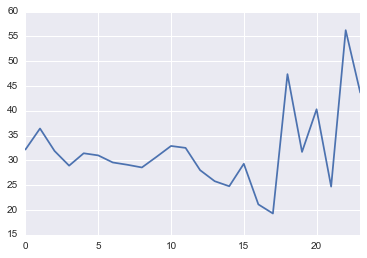

In [20]:
%matplotlib inline

df['price_cph'].plot()

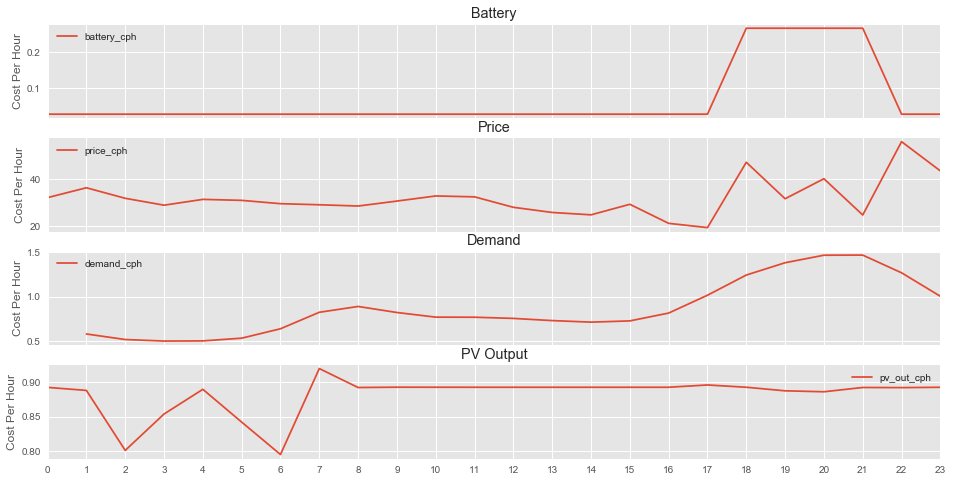

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

fig, ax = plt.subplots(4, 1, figsize=(16, 8), sharey=False, sharex=True)
plt.xticks(np.arange(0, 24))

df.plot.line(df.index, 'battery_cph', ax=ax[0])
df.plot.line(df.index,'price_cph', use_index=True, ax=ax[1])
df.plot.line(df.index,'demand_cph', ax=ax[2])
df.plot.line(df.index,'pv_out_cph', ax=ax[3])

ax[0].set_title("Battery")
ax[1].set_title("Price")
ax[2].set_title("Demand")
ax[3].set_title("PV Output")

for a in ax:
    a.set_ylabel("Cost Per Hour")

## Alternate Cost Scenarios

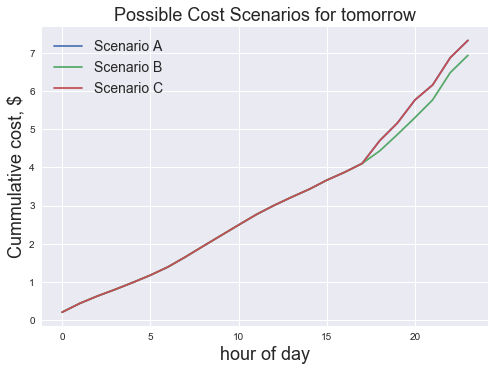

In [76]:
#In scenario A, baseline case where we just don't run the battery. Do this by setting B = 0 and cycles = 0 in battery cost formula:
df['Scenario_A'] = 1 * (df['price_cph']/1000 * (df['demand_cph'] - df['pv_out_cph'] - 0)) + sundial.battery_model.bat_price_per_hour(0,t_start,t_final,date,cap_kWhr,cost_mult)
df['Scenario_A'] = df['Scenario_A'].cumsum()
#In scenario B, we choose to cycle during certain hours input by user:
t_start    = 18   # 6:00pm, sun goes down, USER INPUT
t_final    = 22   #USER INPUT
#also can input rate, as percent per hour, but total in cycle can't exceed max_cap
rate = 0.15 # % of capacity per hour, USER INPUT
usage_kWhr = np.min([cap_kWhr*rate*(t_final-t_start),cap_kWhr])
B = np.zeros(24)
B[t_start:t_final] = usage_kWhr/(t_final-t_start)

df['Scenario_B'] = 1 * (df['price_cph']/1000 * (df['demand_cph'] - df['pv_out_cph'] - B)) + sundial.battery_model.bat_price_per_hour(usage_kWhr,t_start,t_final,date,cap_kWhr,cost_mult)
df['Scenario_B'] = df['Scenario_B'].cumsum()

#In scenario C, we choose to cycle battery during hours when cost exceeds XX
cost_thresh = 60 # [$/MWhr,], USER INPUT
rate = 0.15 # % of capacity per hour, USER INPUT
is_higher = np.nonzero(df['price_cph'] > cost_thresh)
if len(is_higher[0]) > 0:
    t_start = np.min(is_higher)
    t_final = np.max(is_higher) #assume single cycle, even if price momentarily dips below
    usage_kWhr = np.min([cap_kWhr*rate*(t_final-t_start),cap_kWhr])
    B = np.zeros(24)
    B[t_start:t_final] = usage_kWhr/(t_final-t_start)
else:
    usage_kWhr = 0
    B = 0

df['Scenario_C'] =  1 * (df['price_cph']/1000 * (df['demand_cph'] - df['pv_out_cph'] - B)) + sundial.battery_model.bat_price_per_hour(usage_kWhr,t_start,t_final,date,cap_kWhr,cost_mult)
df['Scenario_C'] = df['Scenario_C'].cumsum()

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

#fig, ax = plt.subplots(3, 1, figsize=(16, 8), sharey=False, sharex=True)
plt.style.use('seaborn')
plt.plot(df.index,df['Scenario_A'],df.index,df['Scenario_B'],df.index,df['Scenario_C'])
plt.xlabel('hour of day', fontsize=18)
plt.ylabel('Cummulative cost, $',fontsize=18)
plt.title('Possible Cost Scenarios for tomorrow',fontsize=18)
plt.legend(('Scenario A','Scenario B','Scenario C'),fontsize=14)

In [50]:
B

array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  2.025,  2.025,  2.025,  2.025,  2.025,  0.   ])